# Airbnb Data Analysis

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is based in San Francisco, California, United States and it stands for Airbed and breakfast.



This dataset cotains the information about the the host, neighbourhood, location in terms of latitude and longitude, price, service fees, information about reviews by the customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bnb_data = pd.read_csv('Airbnb Data.csv')

/var/folders/c3/n4pfcbcs62l8z0csfrp_wcv00000gn/T/ipykernel_1270/1308837161.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  bnb_data = pd.read_csv('Airbnb Data.csv')


By default, pandas attempts to infer data types column by column in small parts to avoid using too much memory. 
After giving low_memory as false, pandas will read the entire file in one go to determine the correct data types for all columns.



In [3]:
bnb_data = pd.read_csv('Airbnb Data.csv', low_memory = False)

In [4]:
bnb_data.sample(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
100179,56330198,"Brand New Modern Luxury Apt, Room C",28823101111,unconfirmed,Jerry,Brooklyn,Sunset Park,40.65508,-74.00188,United States,...,$96,1.0,24.0,6/15/2019,0.80,1.0,3.0,324.0,NaN,NaN
2666,2473768,Great 1BR apartment in a convenient location,17479883253,verified,Tom,Queens,Long Island City,40.74449,-73.95201,United States,...,$73,1.0,4.0,7/5/2016,0.06,1.0,1.0,36.0,NaN,NaN
99861,56154566,Big bright room in fantastic location,27872927731,verified,Nathan,Brooklyn,Williamsburg,40.71210,-73.95892,United States,...,$166,2.0,19.0,4/24/2019,0.60,2.0,1.0,19.0,NaN,NaN
73426,41554516,Gay friendly in NYC,46856848969,verified,Rob,Brooklyn,Bushwick,40.69401,-73.90578,United States,...,$129,1.0,12.0,12/31/2018,0.74,3.0,2.0,0.0,NaN,NaN
24132,14329440,Chelsea/Flatiron 1-Bedroom Apt in Luxury Building,31180815522,verified,Ted,Manhattan,Chelsea,40.74379,-73.99433,United States,...,$228,2.0,7.0,4/30/2019,0.30,1.0,1.0,0.0,Please be respectful of other guests. Keep th...,NaN
43393,24967290,Private Bedroom in Williamsburg Apt!,26082052017,unconfirmed,Andi,Brooklyn,Williamsburg,40.71829,-73.95819,United States,...,$46,3.0,3.0,4/28/2019,1.07,3.0,2.0,97.0,NaN,NaN
71962,40745949,Lovely House in the Hill/ 2bedrm apt,42752031306,verified,Kevin,Brooklyn,Fort Greene,40.68504,-73.96960,United States,...,$57,7.0,43.0,6/13/2019,1.20,3.0,1.0,53.0,NaN,NaN
60867,34618180,"Private Studio, Hudson Yards 3A",63877263916,verified,Hudson,Manhattan,Hell's Kitchen,40.75609,-73.99801,United States,...,$240,2.0,7.0,12/19/2021,0.63,4.0,22.0,173.0,NaN,NaN
32117,18739555,New unit Amazing apartment on 5th ave 3 bdr #4,83405223473,unconfirmed,Steven,Manhattan,East Harlem,40.80068,-73.94598,United States,...,$238,3.0,36.0,7/1/2019,3.17,5.0,2.0,28.0,Please be respectful of other guests No Pets a...,NaN
52748,30134056,Entire suite close to LGA & JFK with free parking,70624302482,verified,Christian,Queens,East Elmhurst,40.75909,-73.87839,United States,...,$126,1.0,138.0,2/20/2022,2.97,5.0,1.0,188.0,NaN,NaN


In [5]:
bnb_data.shape

(102599, 26)

## Cleaning Of Data

I have dropped few columns which was not for use.

In [6]:
bnb_data.drop(columns=['NAME','country','country code','house_rules','license','last review'], inplace=True)

In [7]:
bnb_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room type                       102599 non-null  object 
 11  Construction year               102385 non-null  float64
 12  price           

In [8]:
bnb_data.isnull().sum()

id                                    0
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [9]:
bnb_data['host_identity_verified'].value_counts()

host_identity_verified
unconfirmed    51200
verified       51110
Name: count, dtype: int64

In [10]:
bnb_data['host_identity_verified'] = bnb_data['host_identity_verified'].map({'verified': 1, 'unconfirmed': 0})

In [11]:
bnb_data['host_identity_verified']

0         0.0
1         1.0
2         NaN
3         0.0
4         1.0
         ... 
102594    1.0
102595    0.0
102596    0.0
102597    0.0
102598    0.0
Name: host_identity_verified, Length: 102599, dtype: float64

In [12]:
bnb_data['instant_bookable'] = bnb_data['instant_bookable'].apply(lambda x: 1 if x is True else (0 if x is False else np.nan))

In [13]:
bnb_data['instant_bookable']

0         0.0
1         0.0
2         1.0
3         1.0
4         0.0
         ... 
102594    0.0
102595    1.0
102596    1.0
102597    1.0
102598    0.0
Name: instant_bookable, Length: 102599, dtype: float64

In [14]:
bnb_data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [15]:
bnb_data['neighbourhood group'] = bnb_data['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

In [16]:
bnb_data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [17]:
bnb_data['price'].unique()

array(['$966 ', '$142 ', '$620 ', ..., '$1,184 ', '$905 ', '$309 '],
      dtype=object)

In [18]:
bnb_data['price'] = bnb_data['price'].str.replace('$', '').str.replace(',', '').str.strip()
bnb_data['price'] = bnb_data['price'].astype(float)
bnb_data.rename(columns={'price': 'price($)'}, inplace=True)

In [19]:
bnb_data['service fee'] = bnb_data['service fee'].str.replace('$', '').str.replace(',', '').str.strip()
bnb_data['service fee'] = bnb_data['service fee'].astype(float)
bnb_data.rename(columns={'service fee': 'service fee ($)'}, inplace=True)

In [20]:
bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  float64
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   instant_bookable                102494 non-null  float64
 9   cancellation_policy             102523 non-null  object 
 10  room type                       102599 non-null  object 
 11  Construction year               102385 non-null  float64
 12  price($)        

In [21]:
bnb_data.isnull().sum()

id                                    0
host id                               0
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price($)                            247
service fee ($)                     273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

The KNNImputer has been used to find appropriate values in place of null values.https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

In [22]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# bnb_data[['lat', 'long']] = imputer.fit_transform(bnb_data[['lat', 'long']])

 Here some of the columns are the kind of columns in which the average values are suitable in place of null values.

In [23]:
columns_with_missing_values_1 = ['price($)','service fee ($)','minimum nights','number of reviews','reviews per month','review rate number']
bnb_data[columns_with_missing_values_1] = bnb_data[columns_with_missing_values_1].fillna(bnb_data[columns_with_missing_values_1].mean())

In [24]:
# columns_with_missing_values_2 = ['host_identity_verified','instant_bookable','neighbourhood group','neighbourhood','cancellation_policy','Construction year','calculated host listings count','availability 365']
# for column in columns_with_missing_values_2:
#     bnb_data[column] = bnb_data[column].fillna(bnb_data[column].mode()[0])

The SimpleImputer from sklearn.impute is a tool used to handle missing values in datasets. It replaces missing values (NaN) with a specified strategy like the mean, median, mode, or a constant value.

np.nan ensures compatibility when working with NumPy arrays, pandas DataFrames, and other numerical computations. It behaves consistently across different libraries like pandas, scipy, and sklearn.

The fit method analyzes the data and computes the values needed for imputation, based on the chosen strategy. It does not modify the data directly but instead calculates the statistic (e.g., mean, median, or most frequent value).

The transform method replaces the missing values (NaNs) in the dataset using the statistics calculated by fit. It modifies the original data by filling in the missing values.

fit_transform is a shortcut that combines both steps: it computes the statistics (fit) and directly applies them (transform).



In [25]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
columns_to_impute = ['host_identity_verified','instant_bookable','neighbourhood group','neighbourhood','cancellation_policy','Construction year','calculated host listings count','availability 365']
bnb_data[columns_to_impute] = imputer.fit_transform(bnb_data[columns_to_impute])

## Analysis of Data

The very first insight I got from dataset is which neighbourhood group is having highest number of counts.

The highest number of airbnb is in Manhatten New York

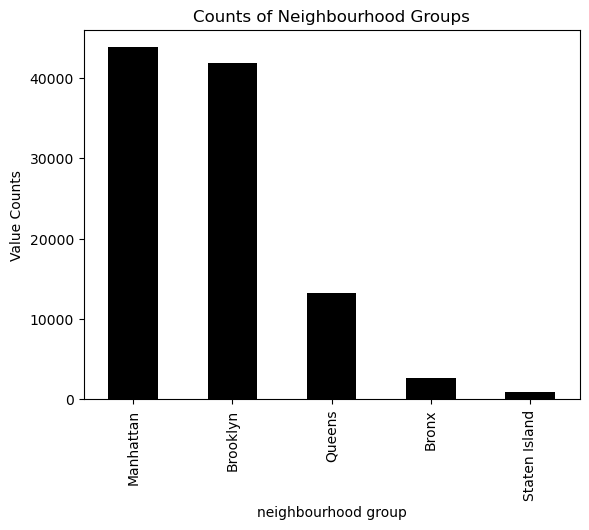

In [46]:
bnb_data['neighbourhood group'].value_counts().plot(kind='bar', color='black')  
plt.ylabel('Value Counts')
plt.title('Counts of Neighbourhood Groups')
plt.show()

This code generates a count plot using the Seaborn library, displaying the frequency of each unique value in the neighbourhood group column.
Here f/fig initialize figure and ax/axes refers to axes.
Here sns.countplot is a plt from seaborn library where 
sns.countplot creates a bar plot where each bar represents the count of occurrences for each unique value in the neighbourhood group column.

/var/folders/c3/n4pfcbcs62l8z0csfrp_wcv00000gn/T/ipykernel_1270/2523948431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data = bnb_data, x = 'neighbourhood group', palette="muted")


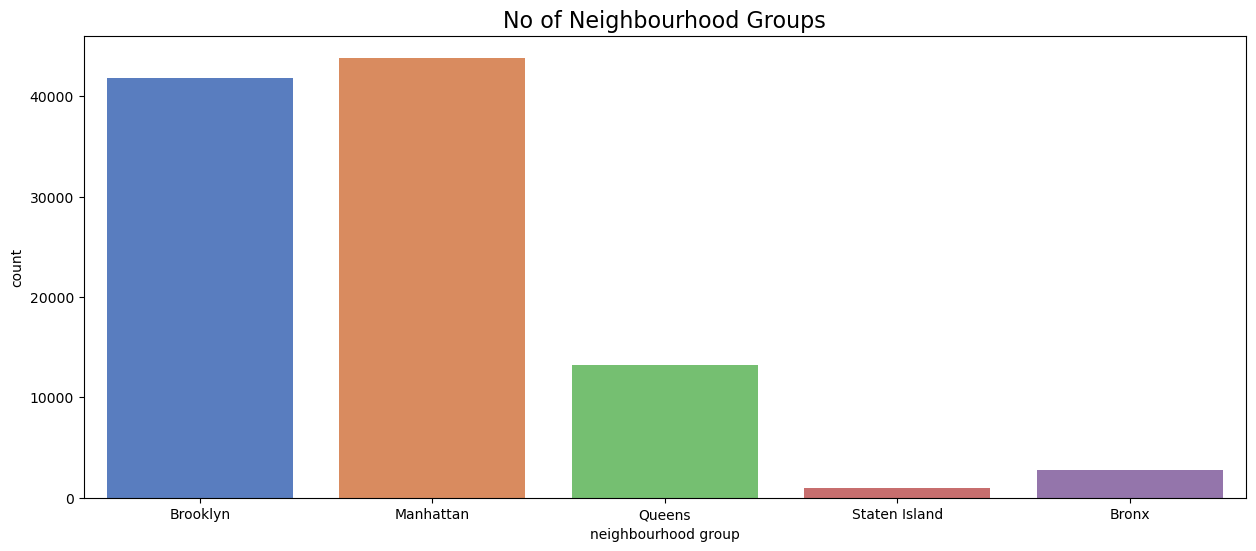

In [48]:
fig,axes = plt.subplots(figsize=(15,6))
axes = sns.countplot(data = bnb_data, x = 'neighbourhood group', palette="muted")
axes.set_title('No of Neighbourhood Groups', fontsize=16)
plt.show()

Here we have found that entire home/appartment is taken by more people compare to other room types.

The hue argument splits the data further based on the same 'room type' column, which would normally color each category differently. Since x and hue use the same column, each category will get a unique color, but only one bar will be drawn for each.



/var/folders/c3/n4pfcbcs62l8z0csfrp_wcv00000gn/T/ipykernel_1270/3703561514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data = bnb_data, x = 'room type',palette="muted")


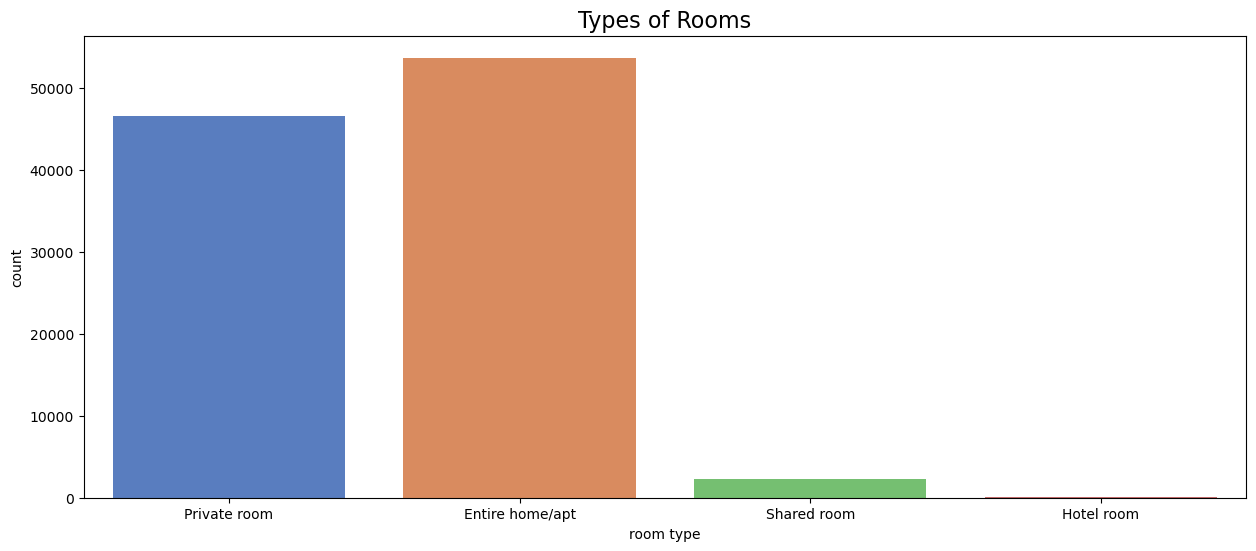

In [28]:
fig,axes = plt.subplots(figsize=(15,6))
axes = sns.countplot(data = bnb_data, x = 'room type', hue = 'room type',palette="muted")
axes.set_title('Types of Rooms', fontsize=16)
plt.show()

Now, we have compare two features with each other. 

What average price each of the neighbourhood groups has? Which neighbourhood group has highest average price and lowest average price?

As these groups are the neighbouring groups of New York, they have minor difference in average price. The highest average price is the price of airbnb in Queens which is approximately 630 dollars and the lowest price is in Manhattan which is approximately 622 dollars.

In [29]:
# import matplotlib.pyplot as plt

# # Group by 'cancellation_policy' and calculate the mean of 'review_rate_number'
# average_reviews_by_policy = bnb_data.groupby('cancellation_policy')['reviews per month'].mean()

# # Plot the bar chart
# fig, ax = plt.subplots(figsize=(10, 6))
# average_reviews_by_policy.plot(kind='bar', color='lightgreen', ax=ax)

# # Add titles and labels
# ax.set_title('Average Review Rate by Cancellation Policy', fontsize=12)
# ax.set_xlabel('Cancellation Policy', fontsize=10)
# ax.set_ylabel('Average Review Rate Number', fontsize=10)

# # Annotate the bars with the average values
# for i, value in enumerate(average_reviews_by_policy):
#     ax.text(i, value + 0.1, f'{value:.2f}', ha='center', fontsize=10)

# # Show the plot
# plt.xticks(rotation=0)
# plt.show()


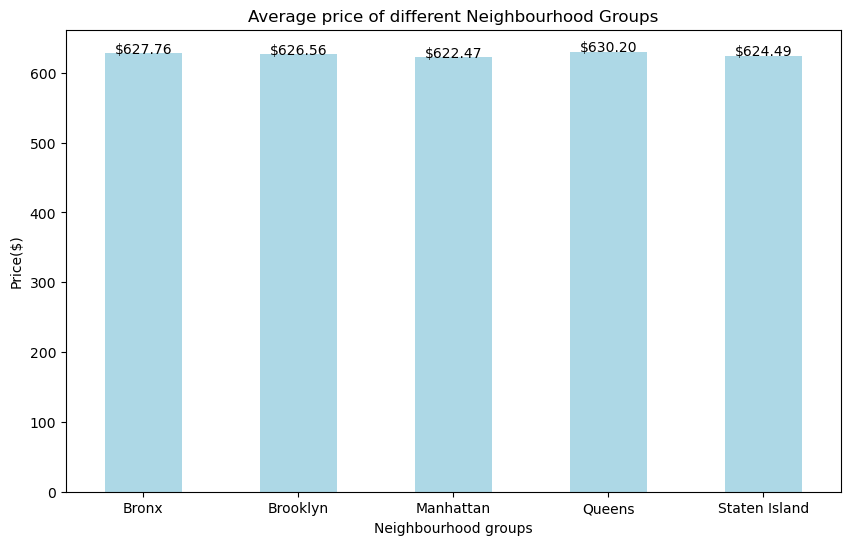

In [30]:
average_reviews_by_policy = bnb_data.groupby('neighbourhood group')['price($)'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
average_reviews_by_policy.plot(kind='bar', color='lightblue', ax=ax)

ax.set_title('Average price of different Neighbourhood Groups', fontsize=12)
ax.set_xlabel('Neighbourhood groups', fontsize=10)
ax.set_ylabel('Price($)', fontsize=10)

for i, value in enumerate(average_reviews_by_policy):
    ax.text(i, value + 0.1, f'${value:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.show()

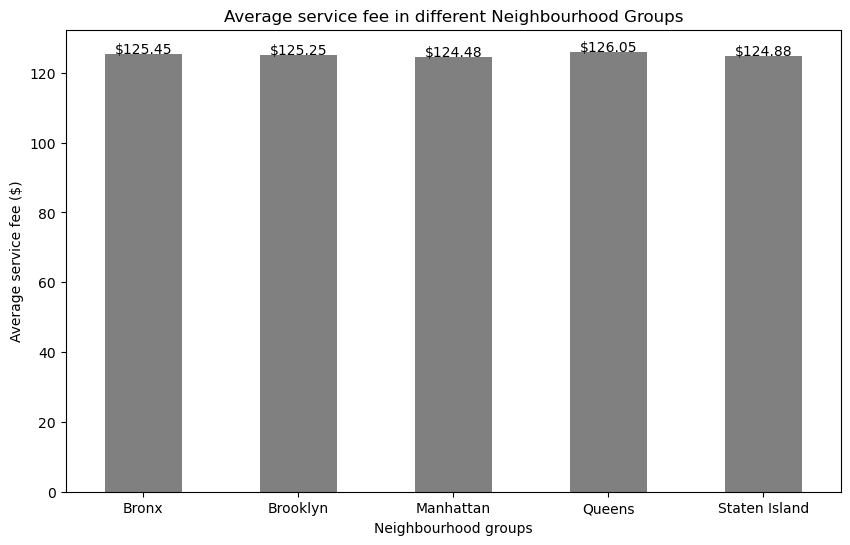

In [31]:
average_reviews_by_policy = bnb_data.groupby('neighbourhood group')['service fee ($)'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
average_reviews_by_policy.plot(kind='bar', color='grey', ax=ax)

ax.set_title('Average service fee in different Neighbourhood Groups', fontsize=12)
ax.set_xlabel('Neighbourhood groups', fontsize=10)
ax.set_ylabel('Average service fee ($)', fontsize=10)

for i, value in enumerate(average_reviews_by_policy):
    ax.text(i, value + 0.1, f'${value:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.show()

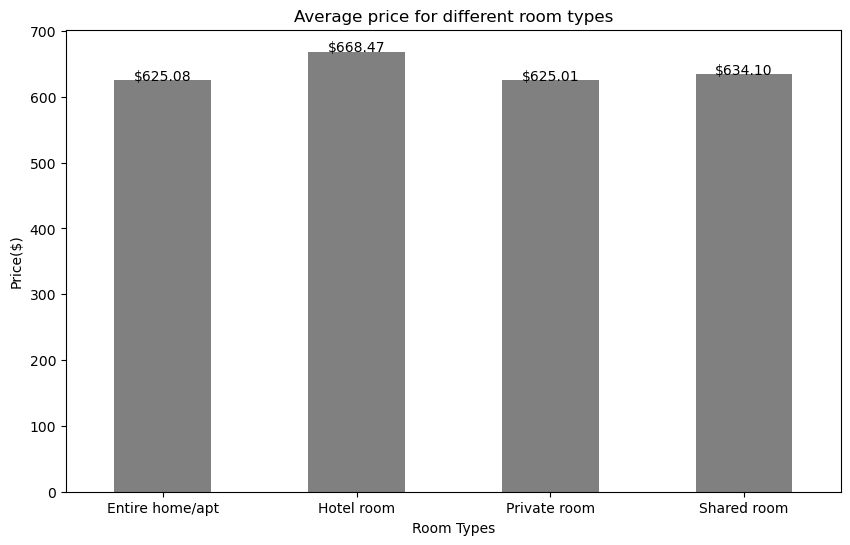

In [32]:
average_reviews_by_policy = bnb_data.groupby('room type')['price($)'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
average_reviews_by_policy.plot(kind='bar', color='grey', ax=ax)

ax.set_title('Average price for different room types', fontsize=12)
ax.set_xlabel('Room Types', fontsize=10)
ax.set_ylabel('Price($)', fontsize=10)

for i, value in enumerate(average_reviews_by_policy):
    ax.text(i, value + 0.1, f'${value:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.show()

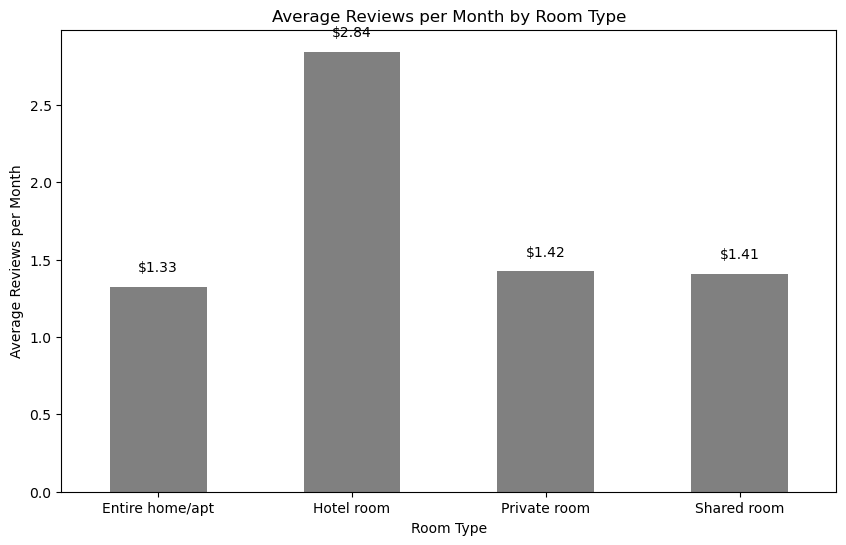

In [33]:
average_reviews_by_policy = bnb_data.groupby('room type')['reviews per month'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
average_reviews_by_policy.plot(kind='bar', color='grey', ax=ax)

ax.set_title('Average Reviews per Month by Room Type', fontsize=12)
ax.set_xlabel('Room Type', fontsize=10)
ax.set_ylabel('Average Reviews per Month', fontsize=10)

for i, value in enumerate(average_reviews_by_policy):
    ax.text(i, value + 0.1, f'${value:.2f}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.show()

This graph shows number of neighbourhood in Brooklyn with its price.

Are most neighbourhoods in Brooklyn similarly priced?

Are there any high or low outliers?
There are bars far away from the rest (very high or low prices), it indicates that some neighbourhoods are significantly more or less expensive.

What is the typical average price range for Brooklyn neighbourhoods?
Approximately 620 to 640 dollars


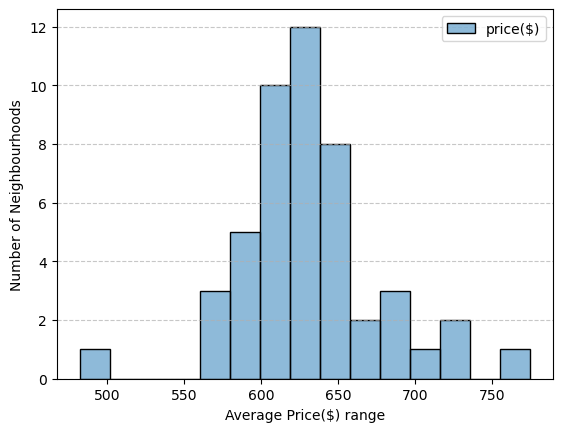

In [34]:
bnb_data1 = bnb_data[bnb_data['neighbourhood group'] == "Brooklyn"][["neighbourhood","price($)"]]
d = bnb_data1.groupby("neighbourhood").mean()
sns.histplot(d, color='skyblue')
plt.xlabel("Average Price($) range", fontsize=10)
plt.ylabel("Number of Neighbourhoods", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

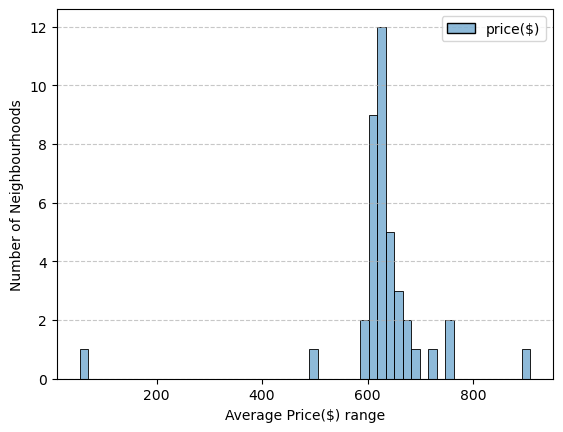

In [35]:
bnb_data1 = bnb_data[bnb_data['neighbourhood group'] == "Manhattan"][["neighbourhood","price($)"]]
d = bnb_data1.groupby("neighbourhood").mean()
sns.histplot(d, color='skyblue')
plt.xlabel("Average Price($) range", fontsize=10)
plt.ylabel("Number of Neighbourhoods", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

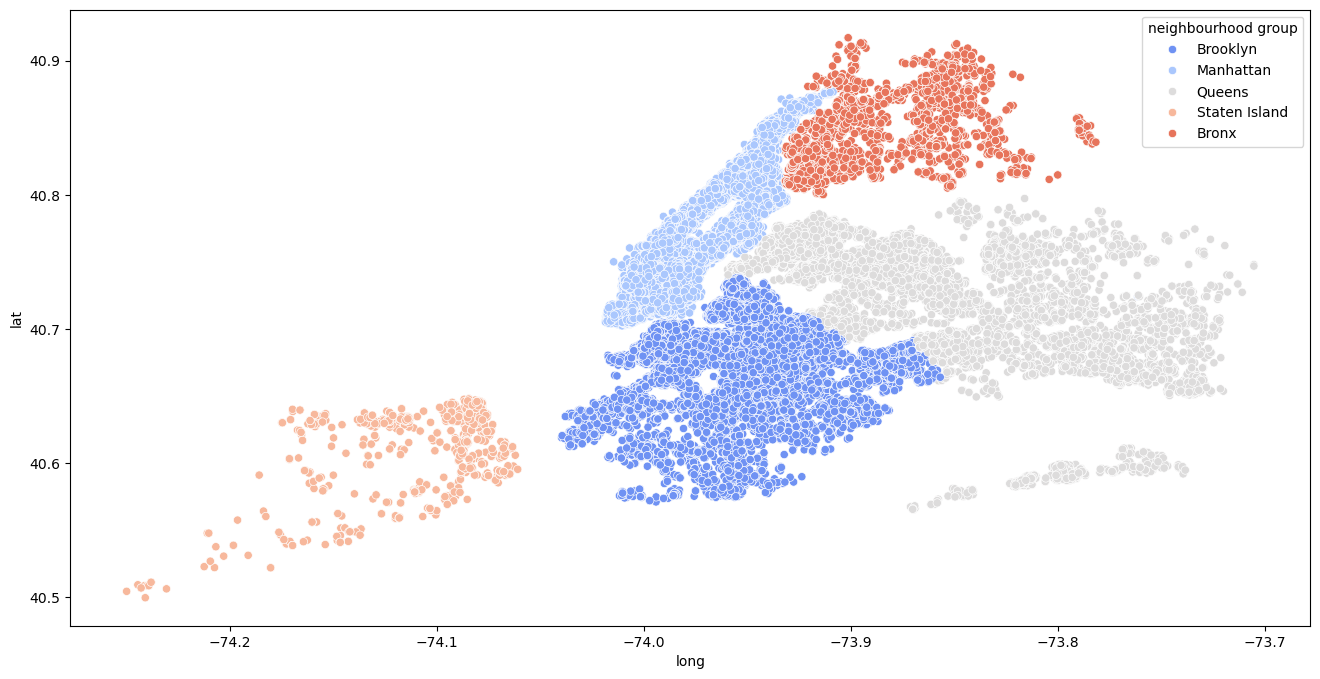

In [36]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=bnb_data.lat,x=bnb_data.long,hue=bnb_data['neighbourhood group'],palette="coolwarm")
plt.show()

/var/folders/c3/n4pfcbcs62l8z0csfrp_wcv00000gn/T/ipykernel_1270/1186221264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bnb_data, x='neighbourhood group',y='availability 365',palette='plasma')


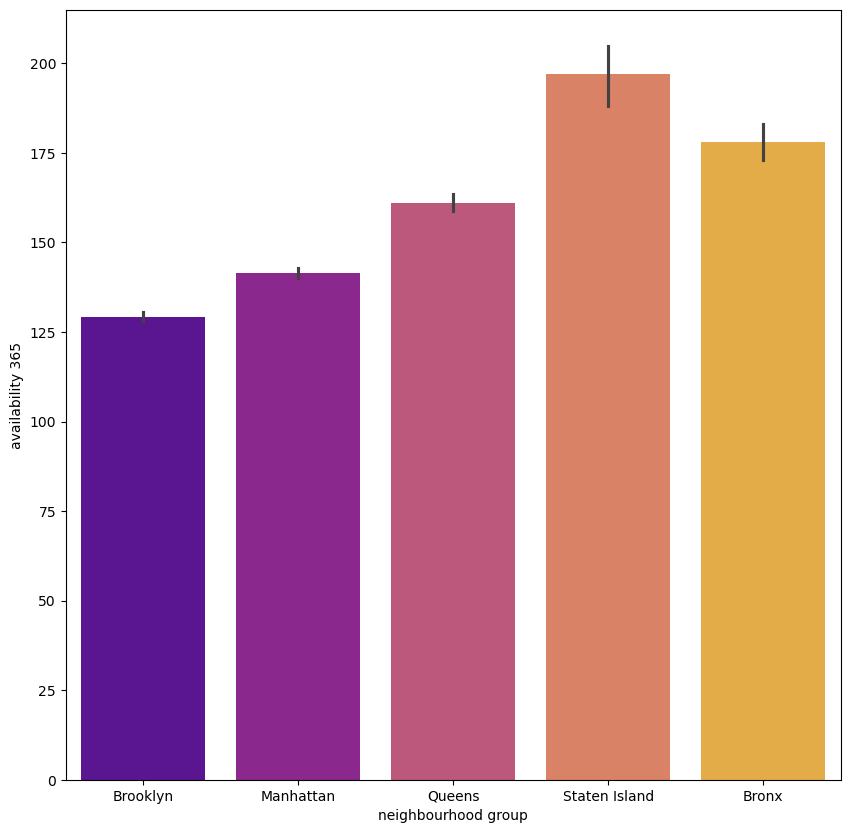

In [37]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=bnb_data, x='neighbourhood group',y='availability 365',palette='plasma')

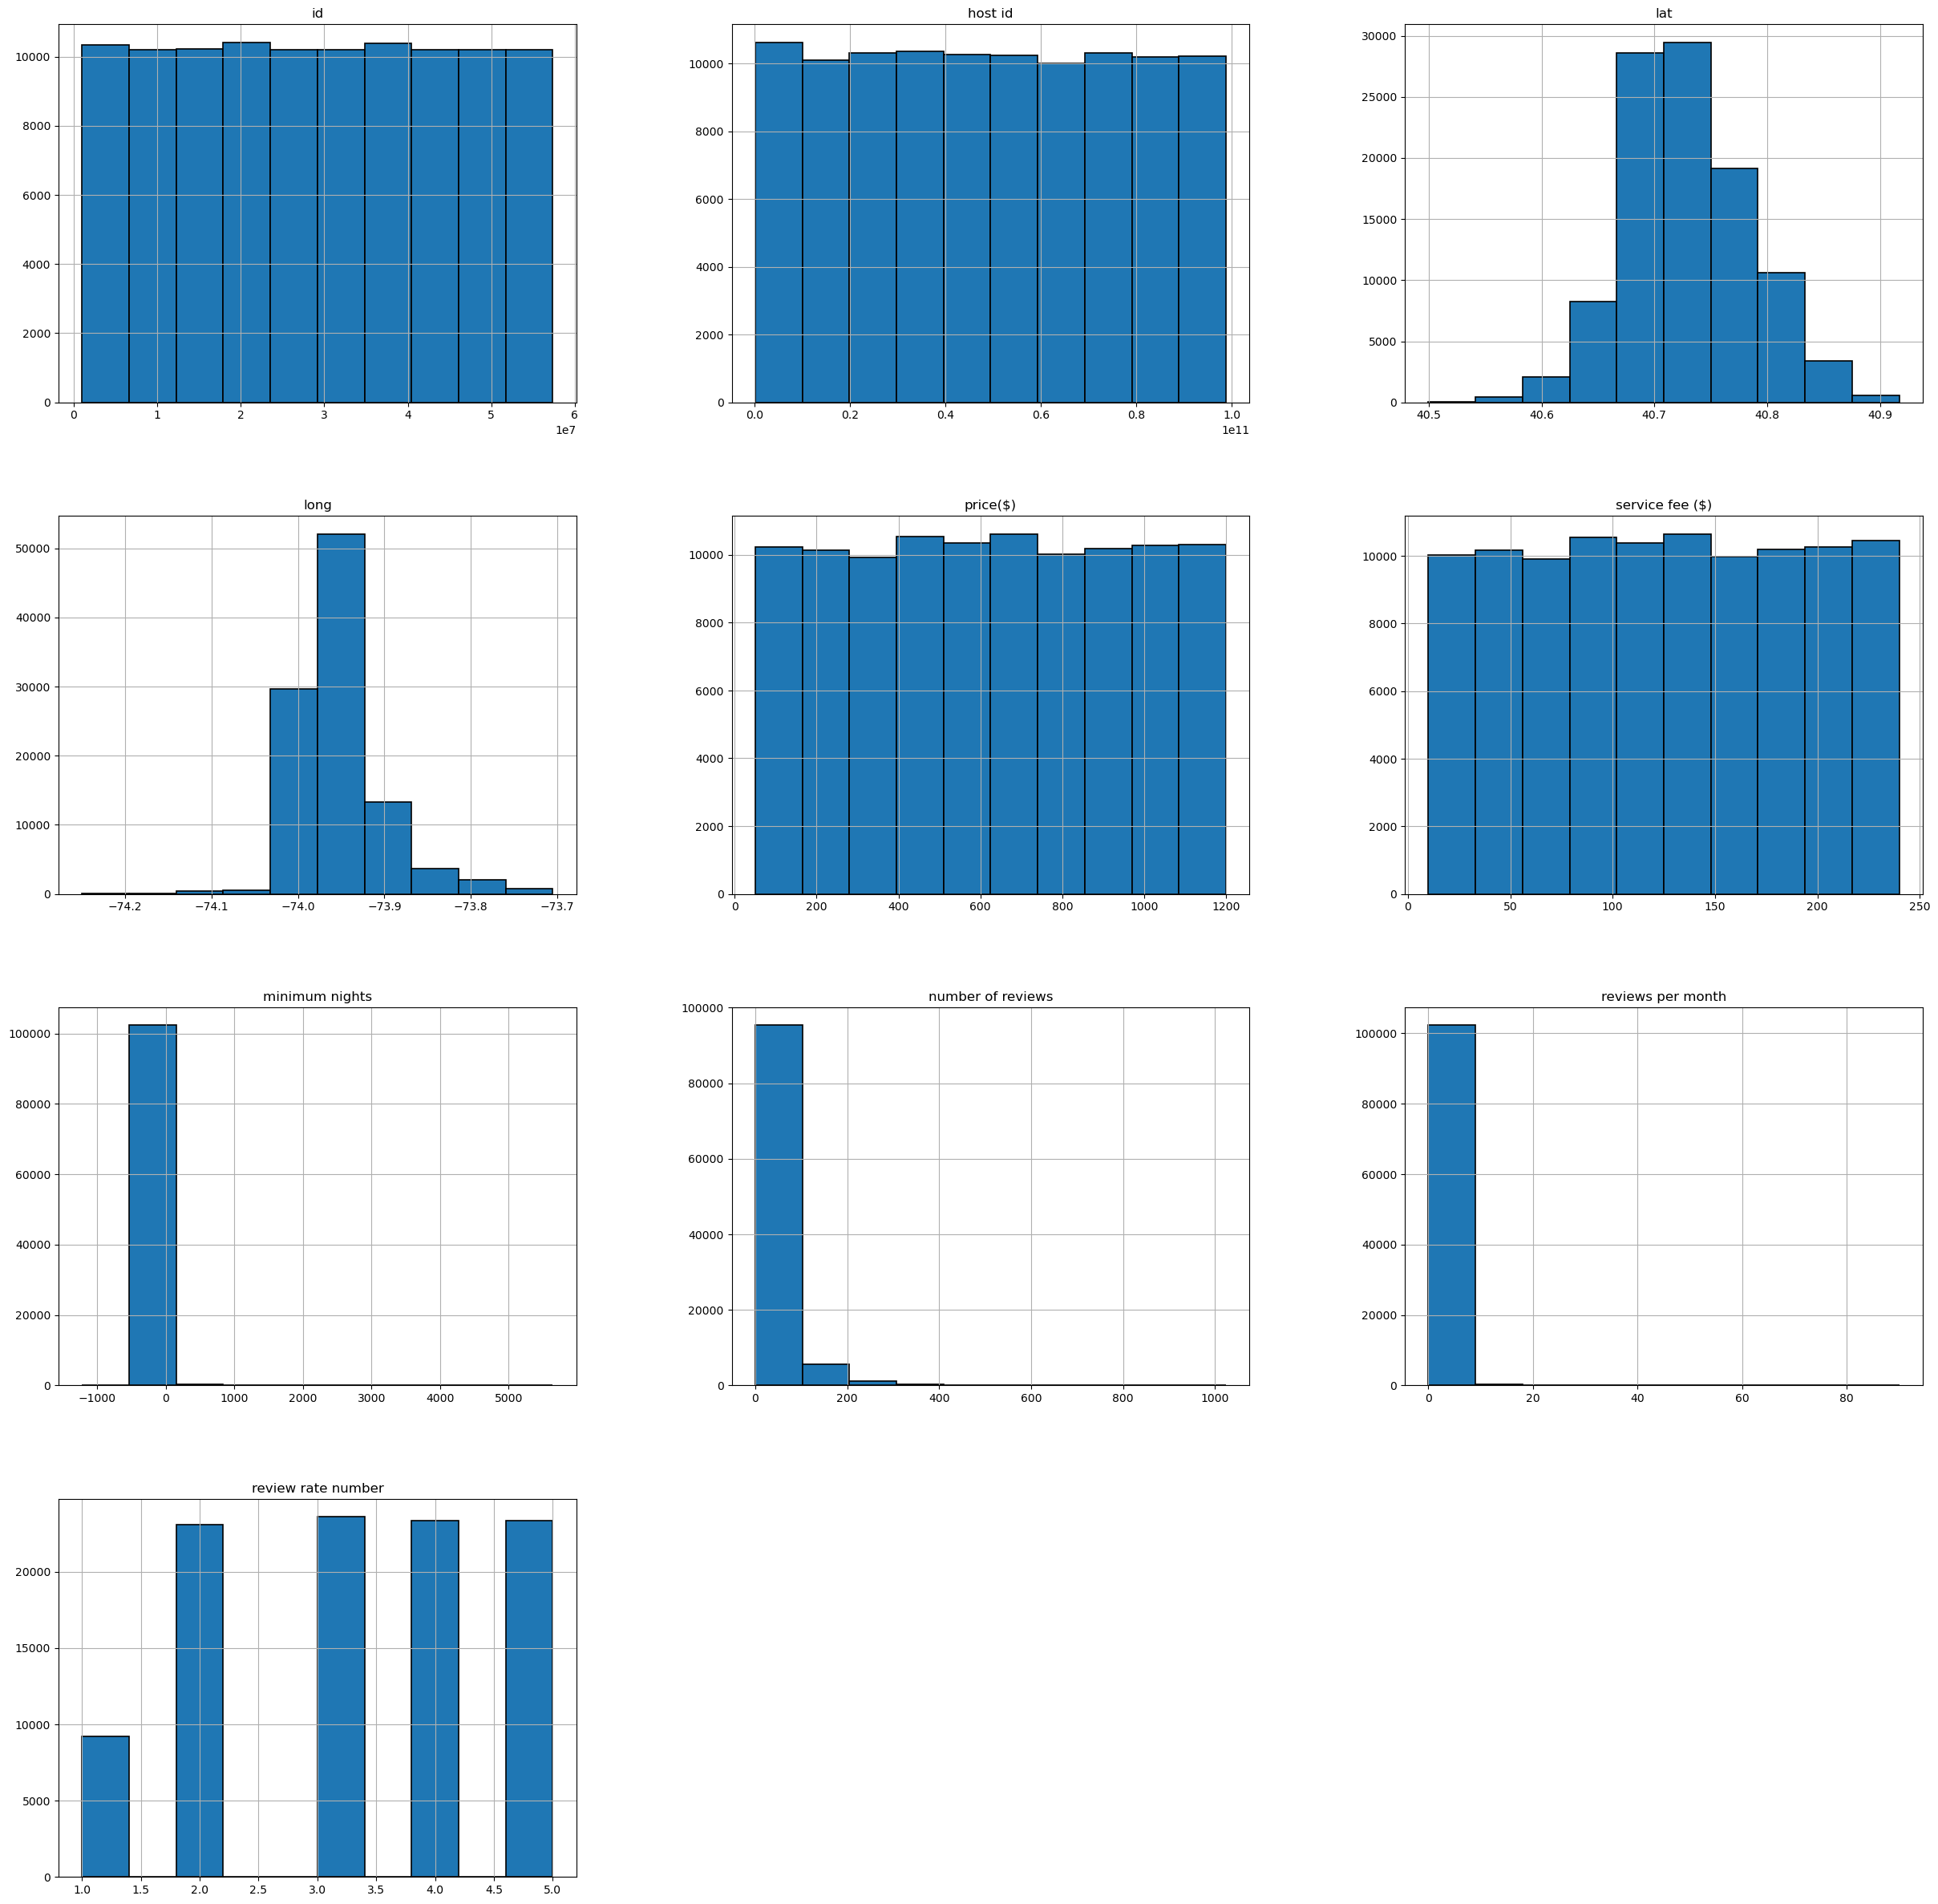

In [38]:
bnb_data.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));